In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('data/train.csv')
target = df['loan_status']

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
0,15000.0,36 months,11.99,498.15,B,B3,Quality Assurance Specialist,4 years,MORTGAGE,70000.0,...,32.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,295215.0,20500.0,453246940
1,3725.0,36 months,6.03,113.38,A,A1,NaN,NaN,MORTGAGE,52260.0,...,9.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,25130.0,14200.0,453313687
2,16000.0,36 months,11.14,524.89,B,B2,KIPP NYC,3 years,RENT,67500.0,...,22.0,f,0.0,1.0,INDIVIDUAL,0.0,193.0,41737.0,19448.0,453283543
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
4,6500.0,36 months,12.69,218.05,B,B5,Medtox Laboratories,10+ years,RENT,41000.0,...,12.0,f,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,453350283


In [4]:
data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id', 'earliest_cr_line', 'grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state','term', 'loan_status', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_amnt', 'installment', 'emp_length', 'tot_coll_amt', 'total_rev_hi_lim', 'open_acc'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 5 columns):
int_rate       200189 non-null float64
sub_grade      200189 non-null int32
annual_inc     200189 non-null float64
dti            200189 non-null float64
tot_cur_bal    200189 non-null float64
dtypes: float64(4), int32(1)
memory usage: 6.9 MB


In [6]:
data.tot_cur_bal.fillna(value=df.tot_coll_amt.mean(),inplace=True)

In [7]:
label_encoder = LabelEncoder()
data['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

In [8]:
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  


In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [10]:
dataset_sc = StandardScaler().fit_transform(data)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
A = []
B = []
C = []

for i in np.linspace(0.1,5,50):
    db = DBSCAN(eps=i, min_samples=10).fit(dataset_sc)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)          
        
    A.append(i)
    B.append(int(n_clusters_))

In [ ]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

In [11]:
db = DBSCAN(eps=0.4, min_samples=20).fit(dataset_sc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [12]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


In [11]:
db = DBSCAN(eps=0.4, min_samples=20)
y_db = db.fit_predict(dataset_sc)

y_db1=db
y_db1=y_db+1

cluster = pd.DataFrame(y_db1)

data['Dbscan'] = cluster

db_mean_cluster = pd.DataFrame(round(data.groupby('Dbscan').mean(),1))
db_mean_cluster

,int_rate,sub_grade,annual_inc,dti,tot_cur_bal
Dbscan,,,,,
0,15.8,14.7,182174.5,14.8,381086.6
1,13.8,11.0,65993.1,16.8,88160.8
2,18.1,19.2,178500.4,9.8,4334.5


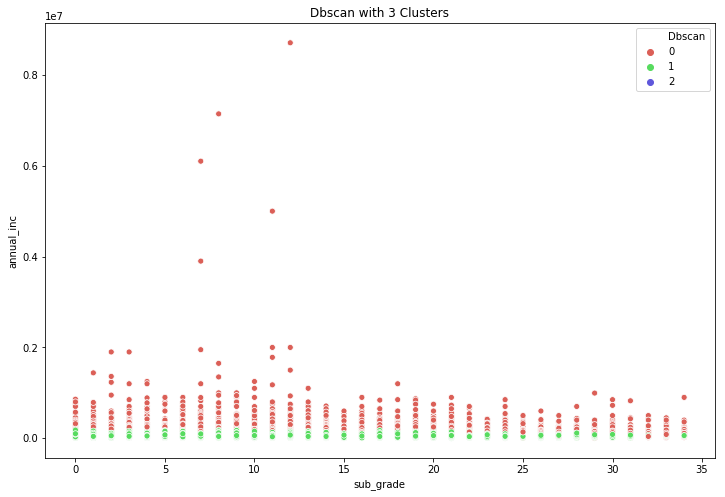

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['sub_grade'], data['annual_inc'], hue=data['Dbscan'], 
                palette=sns.color_palette('hls', 3))
plt.title('Dbscan with 3 Clusters')
plt.show()

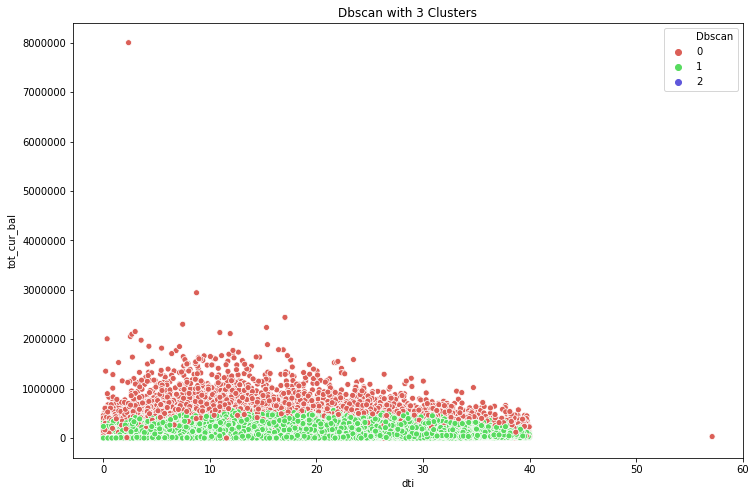

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['dti'], data['tot_cur_bal'], hue=data['Dbscan'], 
                palette=sns.color_palette('hls', 3))
plt.title('Dbscan with 3 Clusters')
plt.show()

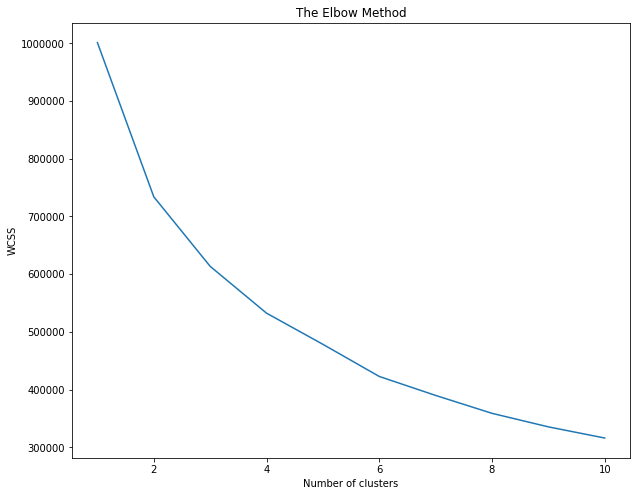

In [18]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)

y_kmeans1=y_kmeans


cluster = pd.DataFrame(y_kmeans1)

data['K-means'] = cluster

kmeans_mean_cluster = pd.DataFrame(round(data.groupby('K-means').mean(),1))
kmeans_mean_cluster

,int_rate,sub_grade,annual_inc,dti,tot_cur_bal,Dbscan
K-means,,,,,,
0,11.0,6.7,74777.0,15.0,104274.3,1.0
1,18.1,17.6,68933.4,19.2,104171.0,0.9


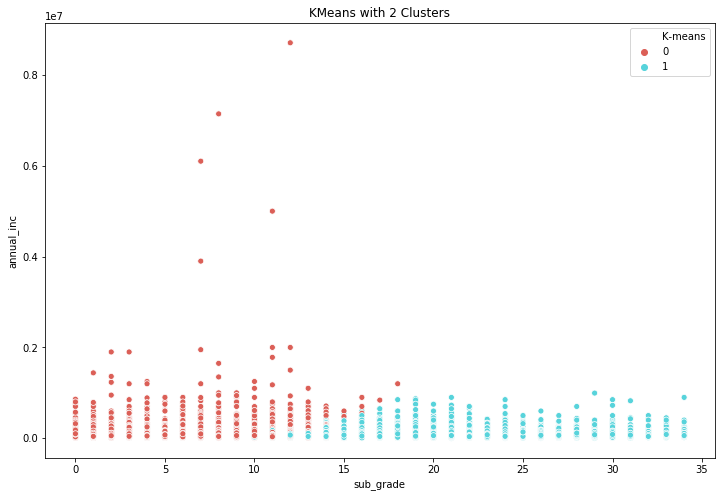

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['sub_grade'], data['annual_inc'], hue=data['K-means'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()

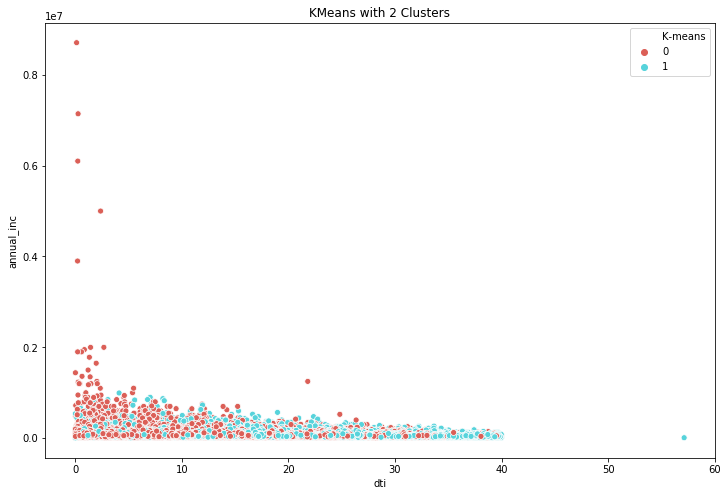

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['dti'], data['annual_inc'], hue=data['K-means'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()

In [22]:
from sklearn import cluster, mixture
mb = cluster.MiniBatchKMeans(n_clusters = 2)
mb_result = mb.fit_predict(dataset1_standardized)
data['MiniKmeans'] = pd.DataFrame(mb_result)
kmeans_minibatch_cluster = pd.DataFrame(round(data.groupby('MiniKmeans').mean(),1))
kmeans_minibatch_cluster

,int_rate,sub_grade,annual_inc,dti,tot_cur_bal,Dbscan,K-means
MiniKmeans,,,,,,,
0,11.5,7.5,73380.5,15.5,103545.2,1.0,0.1
1,18.9,18.9,70276.8,19.2,105663.8,0.9,1.0


In [23]:
data.head()

,int_rate,sub_grade,annual_inc,dti,tot_cur_bal,Dbscan,K-means,MiniKmeans
0,11.99,7,70000.0,13.85,295215.000000,1,0,0
1,6.03,0,52260.0,19.43,25130.000000,1,0,0
2,11.14,6,67500.0,14.77,41737.000000,1,0,0
3,13.33,12,21600.0,39.00,28187.000000,1,1,0
4,12.69,9,41000.0,18.35,159.822179,1,0,0


In [ ]:
spectral = cluster.SpectralClustering(n_clusters = 2)
sp_result= spectral.fit_predict(dataset1_standardized)
data['spectral'] = pd.DataFrame(mb_result)
kmeans_spectral_cluster = pd.DataFrame(round(data.groupby('spectral').mean(),1))
data.head()